In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization

In [2]:
traindata = pd.read_csv("train.csv")
testdata=pd.read_csv("test.csv")

In [3]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ("Rows :" ,traindata.shape[0])
print ("Columns :" ,traindata.shape[1])
print ("\nFeatures : \n" ,traindata.columns.tolist())
print ("\nMissing values :  ", traindata.isnull().sum().values.sum())
print ("\nUnique values :  \n",traindata.nunique())

Rows : 1460
Columns : 81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorc

In [6]:
Missingval=traindata.columns[traindata.isna().any()].tolist()

In [7]:
pd.DataFrame(traindata,columns=Missingval).dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [8]:
pd.DataFrame(traindata,columns=Missingval).isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
#Data Imputation of numerical columns
traindata['LotFrontage'] = traindata['LotFrontage'].replace(np.nan, 0)
traindata['MasVnrArea'] = traindata['MasVnrArea'].replace(np.nan, 0)
traindata['GarageYrBlt'] = traindata['GarageYrBlt'].replace(np.nan, 0)

In [10]:
#Data Imputation of categorical columns
traindata['Alley'] = traindata['Alley'].replace({np.nan:'None'})
traindata['BsmtQual'] = traindata['BsmtQual'].replace({np.nan:'None'})
traindata['BsmtCond'] = traindata['BsmtCond'].replace({np.nan:'None'})
traindata['BsmtExposure'] = traindata['BsmtExposure'].replace({np.nan:'None'})
traindata['BsmtFinType1'] = traindata['BsmtFinType1'].replace({np.nan:'None'})
traindata['BsmtFinType2'] = traindata['BsmtFinType2'].replace({np.nan:'None'})
traindata['Electrical'] = traindata['Electrical'].replace({np.nan:'None'})
traindata['FireplaceQu'] = traindata['FireplaceQu'].replace({np.nan:'None'})
traindata['GarageType'] = traindata['GarageType'].replace({np.nan:'None'})
traindata['MasVnrType'] = traindata['MasVnrType'].replace({np.nan:'None'})
traindata['MasVnrType'] = traindata['MasVnrType'].replace({np.nan:'None'})
traindata['GarageFinish'] = traindata['GarageFinish'].replace({np.nan:'None'})
traindata['GarageQual'] = traindata['GarageQual'].replace({np.nan:'None'})
traindata['GarageCond'] = traindata['GarageCond'].replace({np.nan:'None'})
traindata['PoolQC'] = traindata['PoolQC'].replace({np.nan:'None'})
traindata['Fence'] = traindata['Fence'].replace({np.nan:'None'})
traindata['MiscFeature'] = traindata['MiscFeature'].replace({np.nan:'None'})


In [11]:
#Check for any null columns after impuatation
x=traindata.isna().sum()


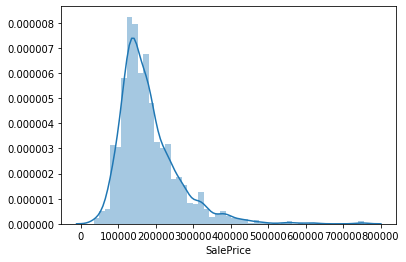

In [18]:
#data exploration using seaborn
distplot=sns.distplot(traindata.SalePrice)

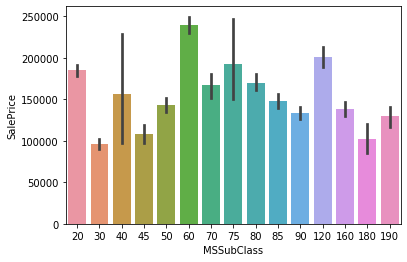

In [20]:
barplot=sns.barplot(x="MSSubClass",y="SalePrice",data=traindata)

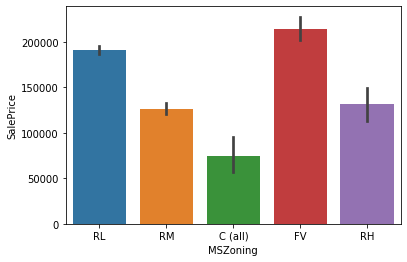

In [21]:
barplot=sns.barplot(x="MSZoning",y="SalePrice",data=traindata)

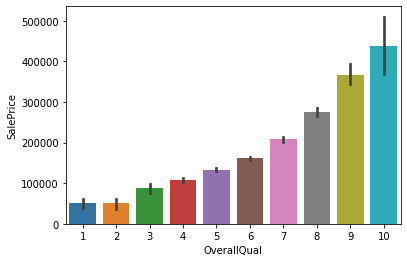

In [31]:
barplot=sns.barplot(x="OverallQual",y="SalePrice",data=traindata)

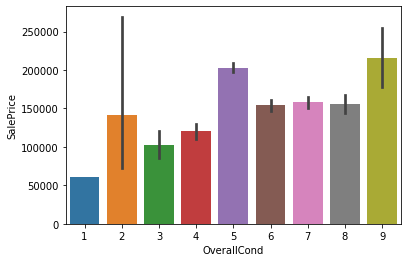

In [29]:
barplot=sns.barplot(x="OverallCond",y="SalePrice",data=traindata)

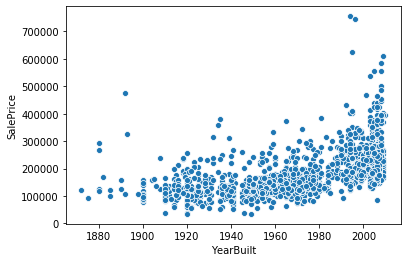

In [32]:
scatterplot=sns.scatterplot(x="YearBuilt",y="SalePrice",data=traindata)

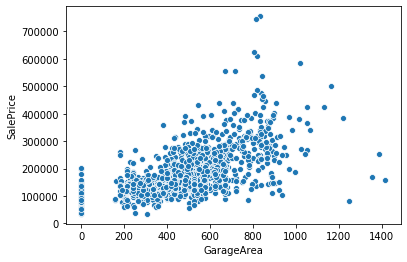

In [33]:
scatterplot=sns.scatterplot(x="GarageArea",y="SalePrice",data=traindata)

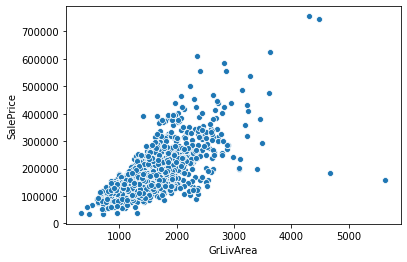

In [38]:
scatterplot=sns.scatterplot(x="GrLivArea",y="SalePrice",data=traindata)

In [40]:
#correlation
correlation = traindata.corr()


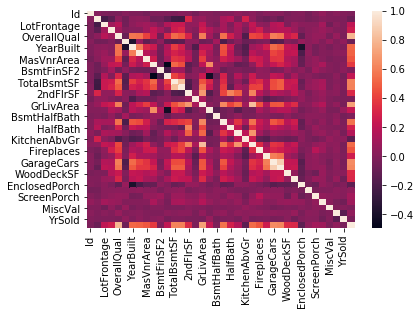

In [53]:
corrplot=sns.heatmap(traindata.corr())